In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../.venv/lib/python3.7/site-packages/')
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Custom code
from coordination.component.speech.vocalics_component import VocalicsComponent
from coordination.inference.vocalics import DiscreteCoordinationInferenceFromVocalics
from coordination.plot.coordination import plot_discrete_coordination, add_discrete_coordination_bar
from coordination.plot.vocalics import plot_vocalic_features

# Trial 745

We use post processed trial data. To generate this data, execute the script `coordination/scripts/parse_and_save_single_metadata_file.py`.

In [3]:
# Constants
NUM_TIME_STEPS = 17 * 60 #(17 minutes of mission in seconds)
M = int(NUM_TIME_STEPS/2) # We assume coordination in the second half of the period is constant
P_COORDINATION_TRANSITION = 0.1 # Coordination changes with small probability
P_COORDINATION = 0 # The process starts with no coordination
NUM_FEATURES = 2 # Pitch and Intensity

# Parameters of the distributions
MEAN_PRIOR_A = np.zeros(NUM_FEATURES)
MEAN_PRIOR_B = np.zeros(NUM_FEATURES)
STD_PRIOR_A = np.ones(NUM_FEATURES)
STD_PRIOR_B = np.ones(NUM_FEATURES)
STD_UNCOORDINATED_A = np.ones(NUM_FEATURES)
STD_UNCOORDINATED_B = np.ones(NUM_FEATURES)
STD_COORDINATED_A = np.ones(NUM_FEATURES)
STD_COORDINATED_B = np.ones(NUM_FEATURES)

## Vocalic Features

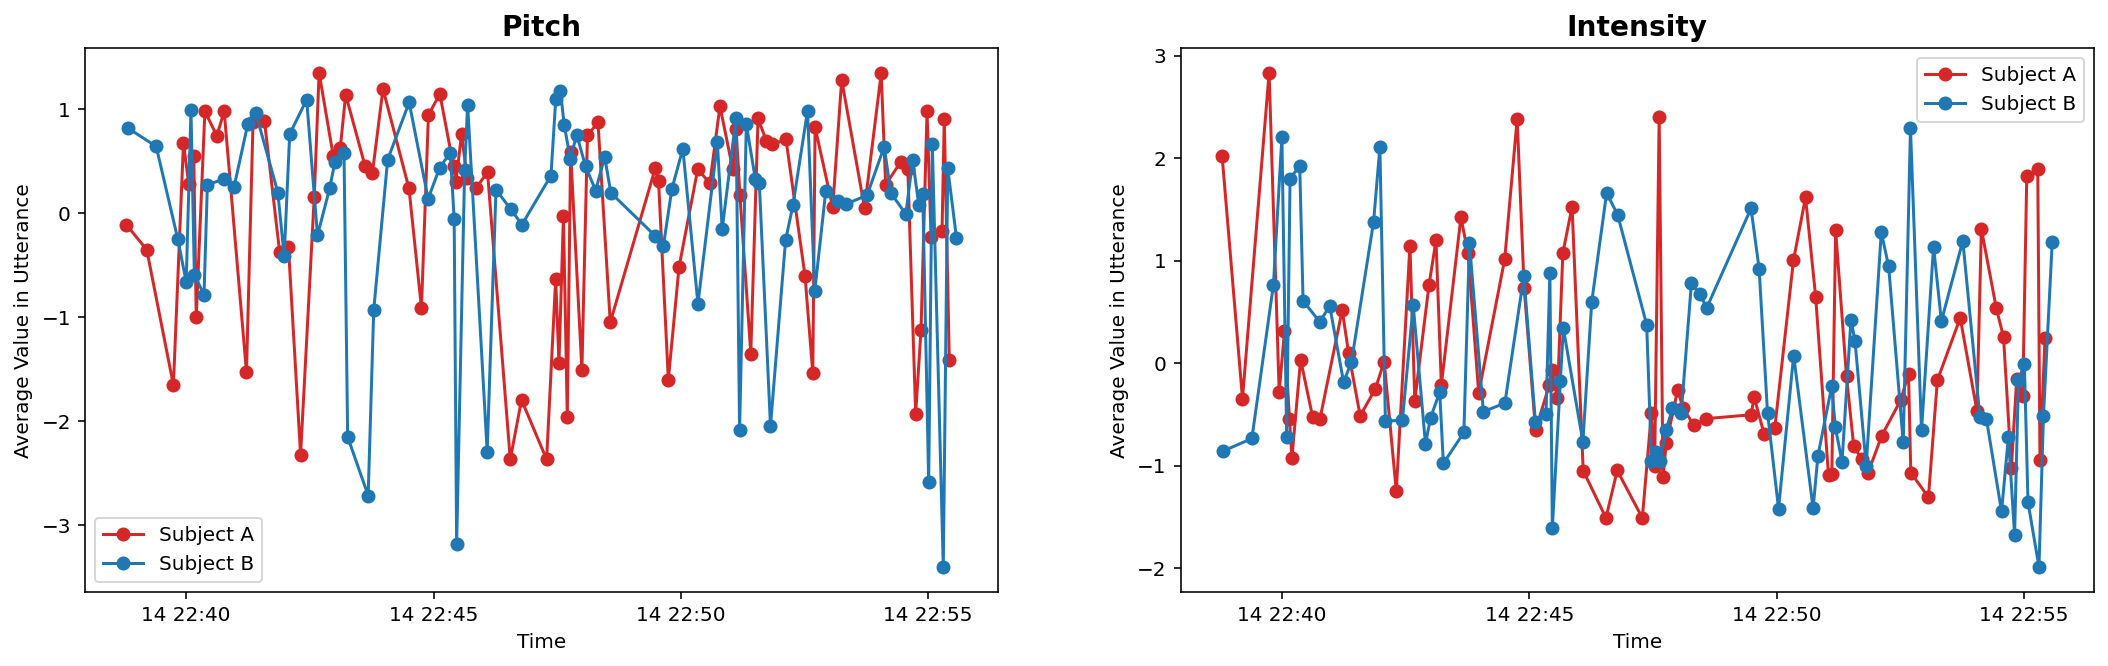

In [4]:
vocalics_component = VocalicsComponent.from_trial_directory("../data/study-3_2022/T000745/")

fig, axs = plt.subplots(1, 2, figsize=(18,5))
vocalics_component.plot_features(axs, 1020, True, True)

## Inference

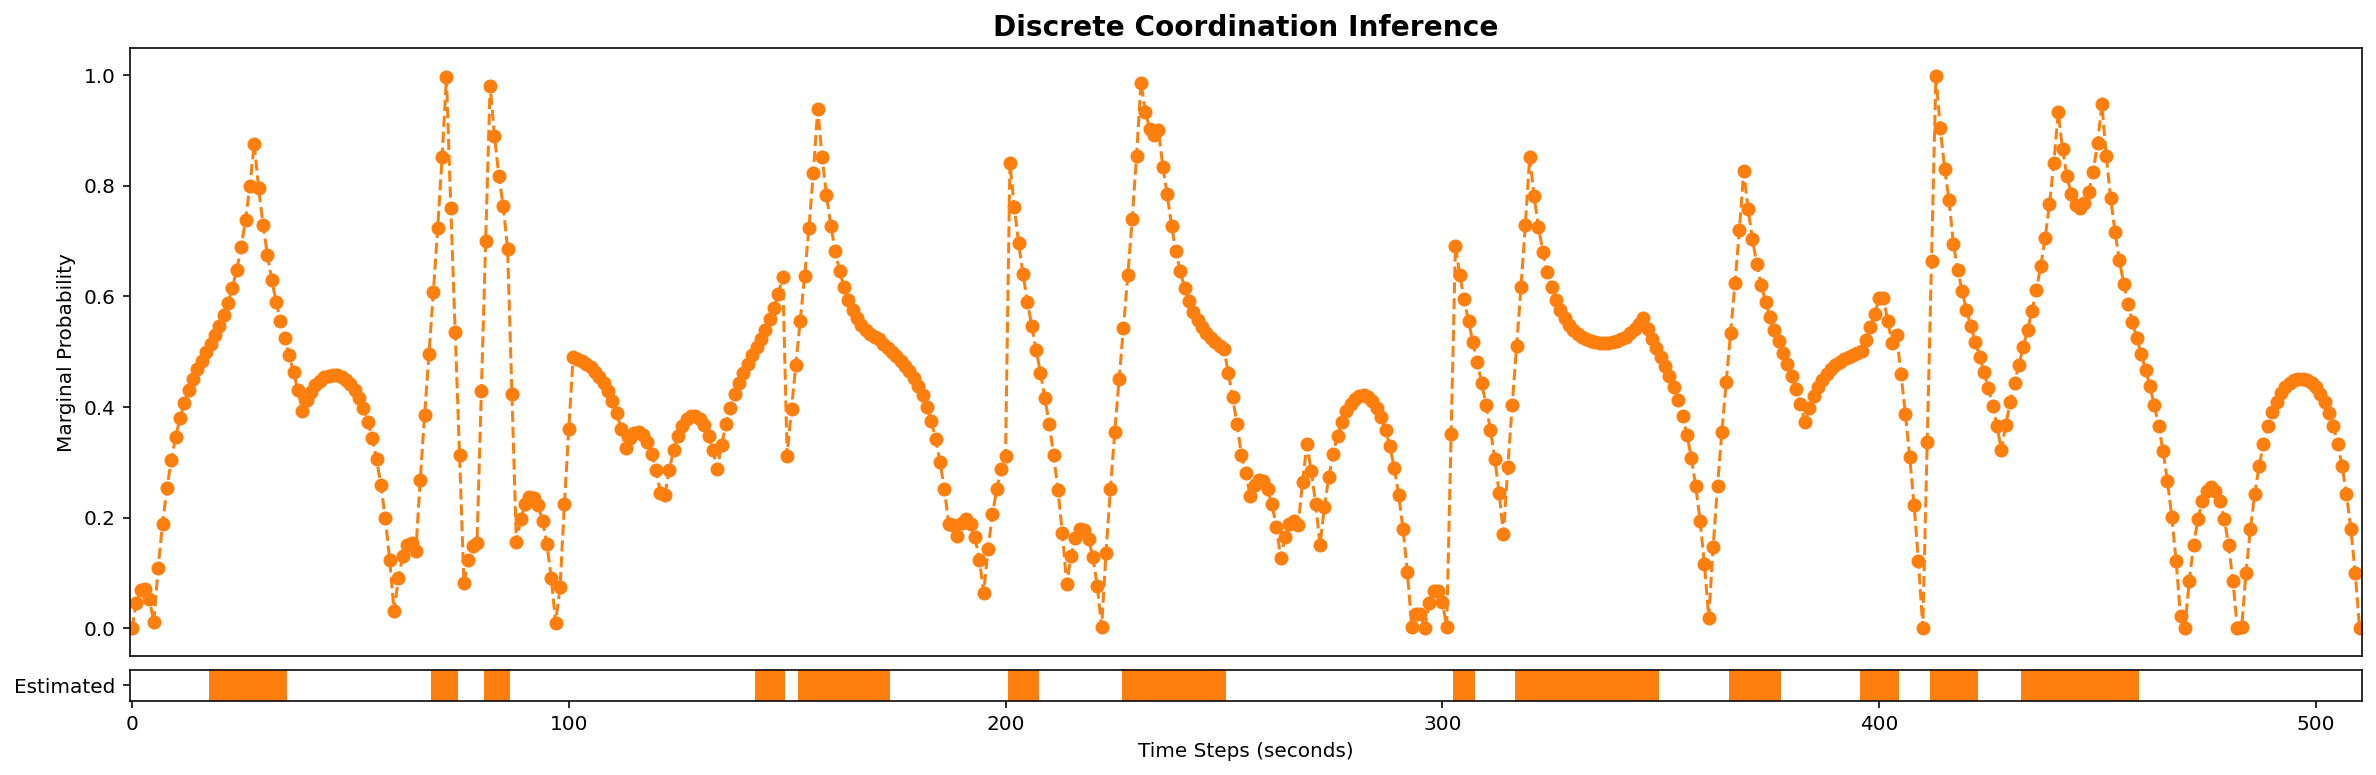

In [5]:
vocalics_a, vocalics_b = vocalics_component.sparse_series(NUM_TIME_STEPS)
vocalics_a.normalize()
vocalics_b.normalize()

inference_engine = DiscreteCoordinationInferenceFromVocalics(series_a=vocalics_a, 
                                                             series_b=vocalics_b, 
                                                             p_prior_coordination=P_COORDINATION, 
                                                             p_coordination_transition=P_COORDINATION_TRANSITION, 
                                                             mean_prior_a=MEAN_PRIOR_A,
                                                             mean_prior_b=MEAN_PRIOR_B,
                                                             std_prior_a=STD_PRIOR_A,
                                                             std_prior_b=STD_PRIOR_B,
                                                             std_uncoordinated_a=STD_UNCOORDINATED_A,
                                                             std_uncoordinated_b=STD_UNCOORDINATED_B,
                                                             std_coordinated_a=STD_COORDINATED_A,
                                                             std_coordinated_b=STD_COORDINATED_B)
marginal_cs = inference_engine.estimate_marginals()[1]
fig = plt.figure(figsize=(20, 6))
plt.plot(range(M+1), marginal_cs, marker="o", color="tab:orange", linestyle="--")
plt.xlabel("Time Steps (seconds)")
plt.ylabel("Marginal Probability")
plt.title("Discrete Coordination Inference", fontsize=14, weight="bold")
add_discrete_coordination_bar(main_ax=fig.gca(),
                              coordination_series=[np.where(marginal_cs > 0.5, 1, 0)],
                              coordination_colors=["tab:orange"],
                              labels=["Estimated"])